<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Aprendizado de Máquina, Agrupamento
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Agrupamento;</li>
  <li>Dados;</li>
  <li>Treino;</li>
  <li>Avaliação;</li>
  <li>Predição.</li>
</ol>

---

# **Exercícios**

## 1\. Pinguins

Neste exercício, vamos utilizar uma base de dados com informações sobre flores do gênero iris. A idéia é agrupar as flores de acordo com suas características físicas (variáveis preditivas). Lembre-se das aulas, nós já temos uma idéia dos agrupamentos.

In [32]:
import sklearn  # Biblioteca para aprendizado de máquina
import numpy as np  # Biblioteca para operações numéricas
import pandas as pd  # Biblioteca para manipulação de dados
import seaborn as sns  # Biblioteca para visualização de dados


Carregamento e Preparação dos Dados

In [33]:
# Carrega o dataset 'iris' do seaborn
iris = sns.load_dataset('iris')

# Remove a coluna 'species' pois não será usada como variável preditiva
iris = iris.drop(['species'], axis=1)

In [34]:
# Exibe as primeiras linhas do dataframe para verificação
iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### **1.1. Analise exploratoria**

Utilize os gráficos abaixo para entender melhor a relação entre os atributos da base de dados. Comente o que observou no gráfico.

 - Atributos preditivos:

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has be

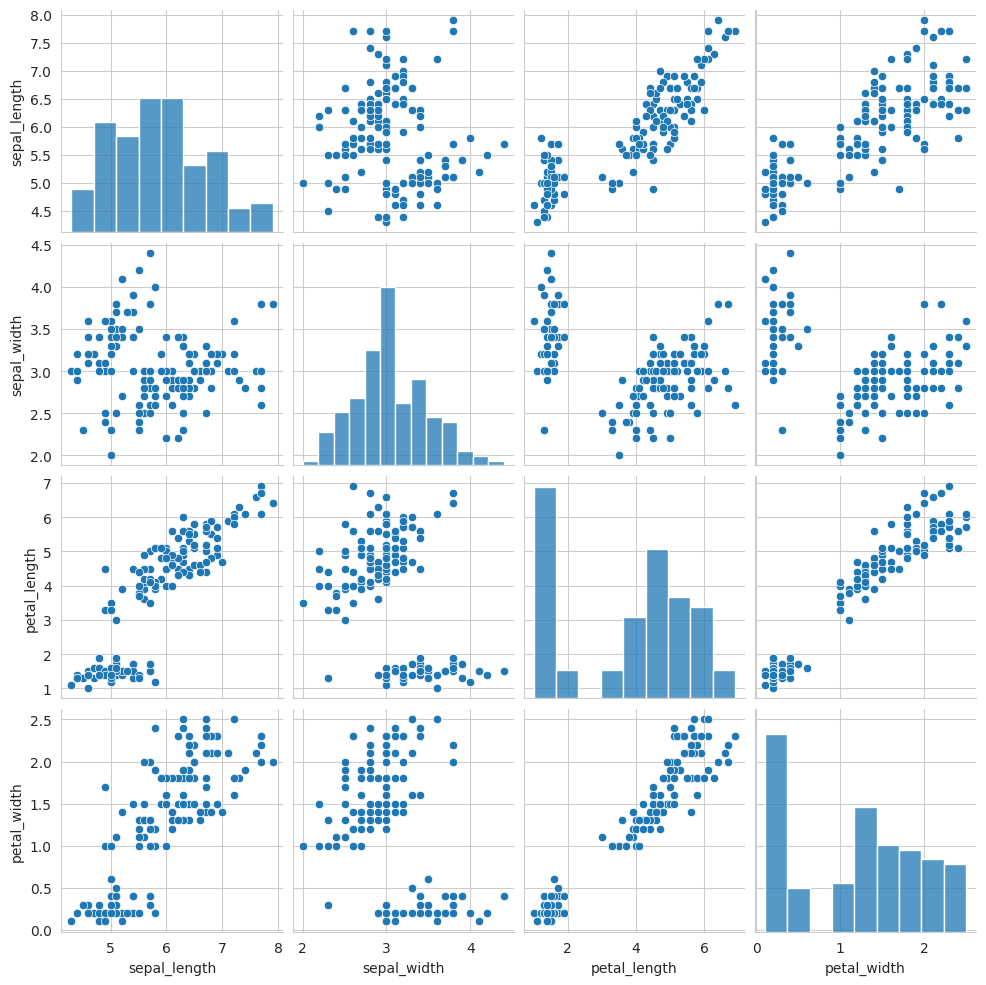

In [35]:
# Cria gráficos de pares para visualizar a relação entre os atributos
with sns.axes_style('whitegrid'):
    grafico = sns.pairplot(data=iris, palette="pastel")

**Comentário:**

**Correlação entre Petal Length e Petal Width:**

Existe uma forte correlação positiva entre o comprimento da pétala (petal length) e a largura da pétala (petal width).
Isso significa que, à medida que o comprimento da pétala aumenta, a largura da pétala também tende a aumentar.

**Correlação entre Sepal Length e Petal Length:**

O comprimento da sépala (sepal length) também mostra uma correlação positiva com o comprimento da pétala (petal length).
Flores com sépalas mais longas tendem a ter pétalas mais longas.

**Distribuição de Sepal Width:**

A largura da sépala (sepal width) não apresenta uma correlação clara com os outros atributos.
A distribuição da largura da sépala parece ser aproximadamente normal, com a maioria dos valores concentrados em torno da média.

**Histograma de Sepal Length:**

O histograma do comprimento da sépala mostra uma distribuição ligeiramente assimétrica, com uma maior concentração de valores em torno de 5 a 6 cm.

**Histograma de Petal Length e Petal Width:**

Os histogramas do comprimento e da largura da pétala mostram distribuições mais variadas, indicando que esses atributos podem ser bons indicadores para diferenciar entre diferentes grupos de flores.

## 2\. Dados

### **2.1. Valores nulos**

Avalie se a base de dados possui valores faltantes, se sim, utilize os conceitos da aula para trata-los.

**Resposta da questão 2.1**Abaixo concluimos que não há valores nulos

In [36]:
# resposta da questão 2.1
# Verifica se há valores nulos no dataset
iris.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0


### **2.2. Variáveis numéricas**

Identifique se existe a necessidade de escalar as variáveis numéricas. Se sim, crie uma nova coluna **padronizando** seus valores. A nova coluna deve ter o mesmo nome da coluna original acrescidade de "*_std*".

> **Nota**: Você não deve tratar a variável resposta.

In [37]:
# resposta da questão 2.2
from sklearn.preprocessing import StandardScaler  # Importa o escalador padrão

# Inicializa o escalador
scaler = StandardScaler()

# Aplica o escalador às variáveis numéricas e cria novas colunas com sufixo '_std'
iris[['sepal_length_std', 'sepal_width_std', 'petal_length_std', 'petal_width_std']] = scaler.fit_transform(iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

In [38]:
# Exibe as primeiras linhas do dataframe para verificação
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,sepal_length_std,sepal_width_std,petal_length_std,petal_width_std
0,5.1,3.5,1.4,0.2,-0.900681,1.019004,-1.340227,-1.315444
1,4.9,3.0,1.4,0.2,-1.143017,-0.131979,-1.340227,-1.315444
2,4.7,3.2,1.3,0.2,-1.385353,0.328414,-1.397064,-1.315444
3,4.6,3.1,1.5,0.2,-1.506521,0.098217,-1.283389,-1.315444
4,5.0,3.6,1.4,0.2,-1.021849,1.249201,-1.340227,-1.315444


### **2.3. Limpeza**

Caso você tenha escalado suas variáveis, descarte as colunas originais e mantenha apenas as variáveis preditivas com o sufixo *_std*", *_nom*" e "*_ord*".

In [39]:
# resposta da questão 2.3
# Remove as colunas originais, mantendo apenas as colunas escaladas
iris = iris.drop(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], axis=1)

# Exibe as primeiras linhas do dataframe para verificação
iris.head()


,sepal_length_std,sepal_width_std,petal_length_std,petal_width_std
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


## 3\. Modelagem

### **3.1. Treino**

Treine 10 modelos de **k-médias** variando o número de clusters de 1 a 10. Para cada modelo treinado, salve o valor global do **wcss** em uma lista.

In [40]:
# resposta da questão 3.1
from sklearn.cluster import KMeans  # Importa o algoritmo KMeans

# Lista para armazenar os valores de WCSS
wcss = []

# Treina modelos KMeans variando o número de clusters de 1 a 10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(iris)
    wcss.append(kmeans.inertia_)  # Salva o valor de WCSS para cada modelo


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

### **3.2. Avaliação**

Gere um gráfico de linha dos valores do **wcss** pelo **número de clusters**. Utilize o método do cotovelo para decidir o número final de clusters.

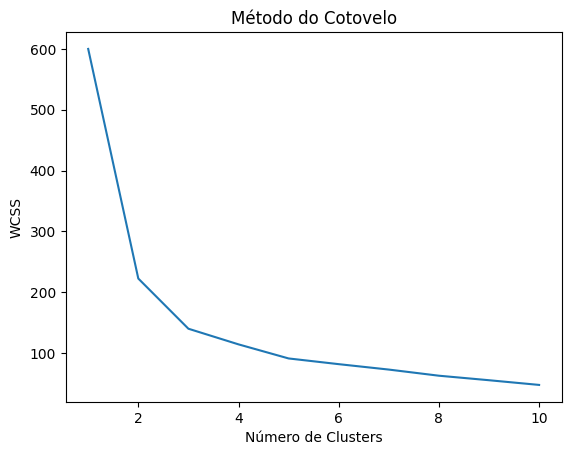

In [41]:
# resposta da questão 3.2
import matplotlib.pyplot as plt  # Importa a biblioteca para gráficos

# Gera um gráfico de linha dos valores de WCSS pelo número de clusters
plt.plot(range(1, 11), wcss)
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()


**Resposta: 3.2**
De acordo com o gráfico de linha através  do método cotovelo, o número ideal de clusters parece ser 3. Isso é indicado pelo ponto onde a curva começa a se estabilizar, formando um “cotovelo” no gráfico. Após esse ponto, o ganho em termos de redução do WCSS (Within-Cluster Sum of Squares) diminui significativamente.

### **3.3. Visualização**

**a)** Utilizando o número de clusters final, adicione uma coluna chamada **cluster** no dataframe **iris** com o número do cluster que cada flor foi alocada.

In [42]:
# resposta da questão 3.3.a
# Define o número ideal de clusters (por exemplo, 3)
kmeans = KMeans(n_clusters=3, random_state=42)
iris['cluster'] = kmeans.fit_predict(iris)

# Exibe as primeiras linhas do dataframe para verificação
iris.head()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,sepal_length_std,sepal_width_std,petal_length_std,petal_width_std,cluster
0,-0.900681,1.019004,-1.340227,-1.315444,1
1,-1.143017,-0.131979,-1.340227,-1.315444,1
2,-1.385353,0.328414,-1.397064,-1.315444,1
3,-1.506521,0.098217,-1.283389,-1.315444,1
4,-1.021849,1.249201,-1.340227,-1.315444,1


**b)** Gere a mesma visualização da sessão 1.1, agora passando como atributo **hue** a coluna **cluster**. Comente os resultados com base no valor esperado do número de clusters.

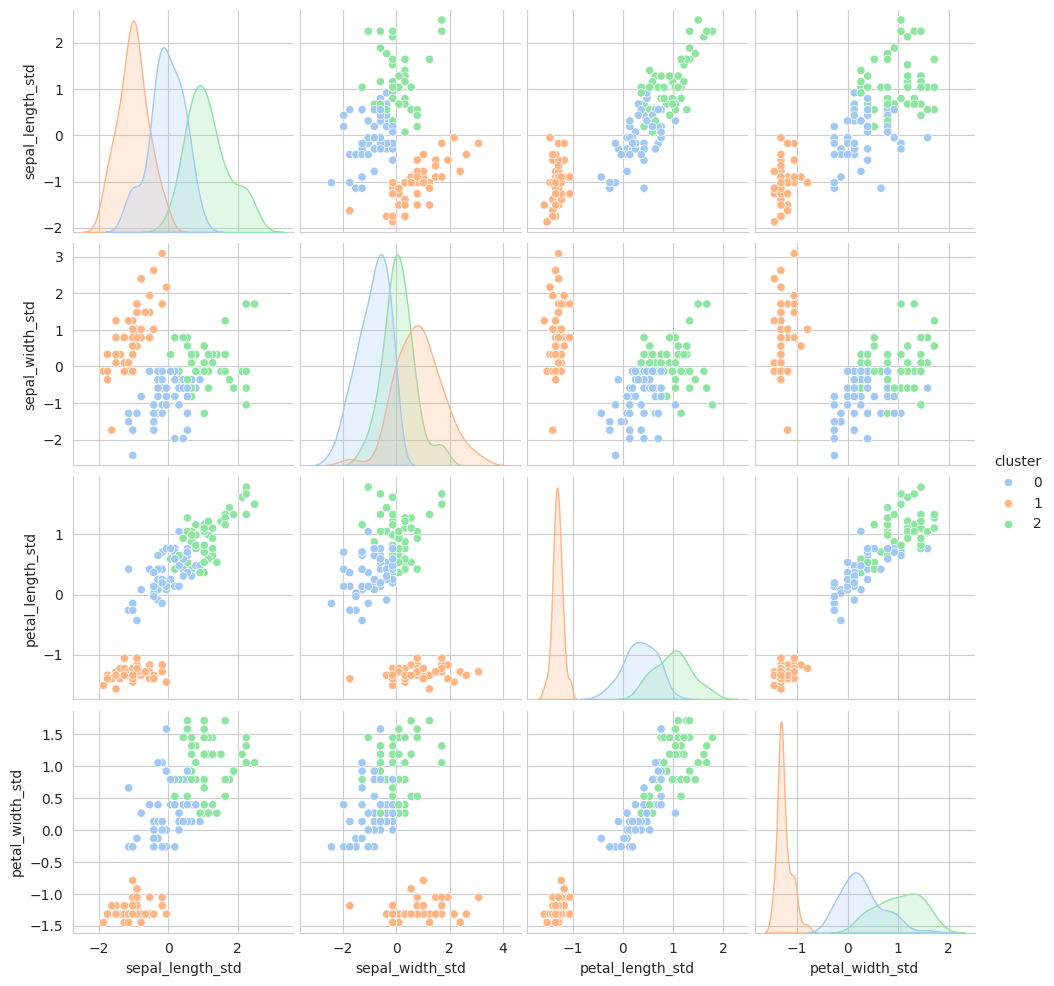

In [43]:
# resposta da questão 3.3.b
# Cria gráficos de pares com a coluna 'cluster' como hue
with sns.axes_style('whitegrid'):
    grafico = sns.pairplot(data=iris, hue='cluster', palette="pastel")


**Comentário:**

A visualização gerada mostra a relação entre os atributos do conjunto de dados iris, agora coloridos de acordo com os clusters atribuídos pelo algoritmo de k-médias. Aqui estão algumas observações com base no gráfico:

**Separação dos Clusters:**

Os pontos de diferentes cores (representando diferentes clusters) estão bem separados em várias combinações de atributos, indicando que o algoritmo conseguiu identificar grupos distintos com base nas características das flores.

Por exemplo, a separação é bastante clara nos gráficos que comparam petal_length_std e petal_width_std, onde os clusters são bem definidos.

**Distribuição dos Atributos:**

As distribuições dos atributos dentro de cada cluster, mostradas nos histogramas na diagonal, também indicam que os clusters têm características distintas.

Cada cluster parece ter uma distribuição específica para cada atributo, o que reforça a ideia de que as flores foram agrupadas de maneira lógica.

**Número de Clusters:**

Com base no método do cotovelo, o número ideal de clusters foi determinado como 3.
A visualização confirma que três clusters são suficientes para capturar a variabilidade nos dados, sem sobrecarregar o modelo com clusters adicionais que não trazem benefícios significativos.

**Comentário Final: **

A visualização com os clusters coloridos ajuda a entender como o algoritmo de k-médias agrupou as flores com base em suas características físicas.
A separação clara entre os clusters em várias combinações de atributos sugere que o número de clusters escolhido é apropriado e que o modelo conseguiu identificar padrões significativos nos dados.

## 4\. Predição  

### **4.1. Nova flor**

Em qual cluster a flor abaixo seria alocada?


| sepal_length	| sepal_width | petal_length | petal_width |
| --- | --- | --- | --- |
| 5.1 | 3.5 | 1.4 | 0.2 |

> **Atenção:** Lembre-se de pre-processar os atributos assim como nos exercício 2.2.

In [44]:
# resposta da questão 4.1
# Dados da nova flor
nova_flor = np.array([[5.1, 3.5, 1.4, 0.2]])

# Escala os dados da nova flor
nova_flor_std = scaler.transform(nova_flor)

# Prediz o cluster da nova flor
cluster_predito = kmeans.predict(nova_flor_std)
# Exibir o resultado da previsão
print(f"A nova flor foi alocada no cluster: {cluster_predito[0]}")


A nova flor foi alocada no cluster: 1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


---